# Flight Data Exploration

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Plots will be displayed inline
%matplotlib inline

In [3]:
flights = pd.read_csv("data/flights.csv", delimiter=",", header="infer")
# Dimension
flights.shape

(271940, 20)

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

1. **Year:** The year of the flight (all records are from 2013)
2. **Month:** The month of the flight
3. **DayofMonth:** The day of the month on which the flight departed
4. **DayOfWeek:** The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
5. **Carrier:** The two-letter abbreviation for the airline.
6. **OriginAirportID:** A unique numeric identifier for the departure aiport
7. **OriginAirportName:** The full name of the departure airport
8. **OriginCity:** The departure airport city
9. **OriginState:** The departure airport state
10. **DestAirportID:** A unique numeric identifier for the destination aiport
11. **DestAirportName:** The full name of the destination airport
12. **DestCity:** The destination airport city
13. **DestState:** The destination airport state
14. **CRSDepTime:** The scheduled departure time
15. **DepDelay:** The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
16. **DelDelay15:** A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
17. **CRSArrTime:** The scheduled arrival time
18. **ArrDelay:** The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
19. **ArrDelay15:** A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
20. **Cancelled:** A binary indicator that the flight was cancelled

Exploration of the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
	- Identify any null or missing data, and impute appropriate replacement values.
	- Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
2. Explore the cleaned data.
	- View summary statistics for the numeric fields in the dataset.
	- Determine the distribution of the DepDelay and ArrDelay columns.
	- Use statistics, aggregate functions, and visualizations to answer the following questions:
	- What are the average (mean) departure and arrival delays?
	- How do the carriers compare in terms of arrival delay performance?
	- Is there a noticable difference in arrival delays for different days of the week?
	- Which departure airport has the highest average departure delay?
	- Do late departures tend to result in longer arrival delays than on-time departures?
	- Which route (from origin airport to destination airport) has the most late arrivals?
	- Which route has the highest average arrival delay?

In [102]:
flights.shape

(271940, 20)

**Identify any null or missing data, and impute appropriate replacement values.**

In [76]:
missing_data = missing_data.rename(columns={0:"EmptyCells"})

In [77]:
missing_data[missing_data.EmptyCells > 0]

,EmptyCells
DepDel15,2761


There are 2761 NULL values in the variable DepDelay15

In [89]:
flights[flights.DepDel15.isnull()][['DepDelay','DepDel15']].head()

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN


So it means where DepDelay15 is a NULL when DepDelay is 0 or if the flight is not delayed.Therefore, it makes sense to impute DepDel15 with 0 when DepDelay is 0.

Impute the values

In [90]:
flights.DepDel15.fillna(value=0,inplace=True)

In [94]:
flights.DepDel15.isnull().sum()

0

**Identify and eliminate any outliers in the DepDelay and ArrDelay columns.**

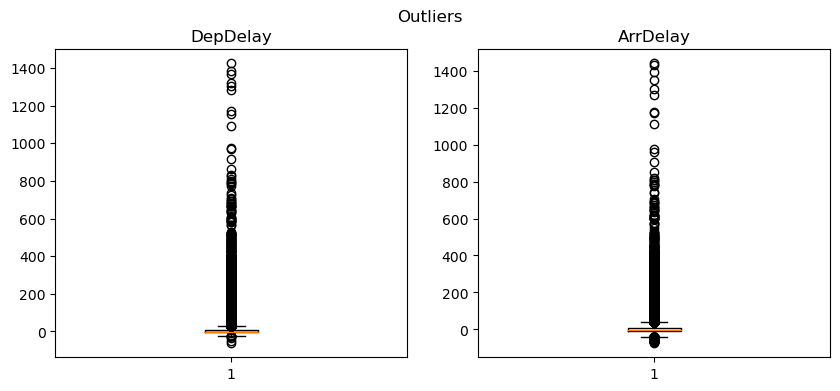

In [124]:
# Option 1: Detecting outliers using boxplots

def create_boxplots(df,col1, col2, title = "Outliers"):
    fig,ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].boxplot(df[col1])
    ax[0].set_title(col1)
    ax[1].boxplot(df[col2])
    ax[1].set_title(col2)
    fig.suptitle(title)

create_boxplots(df=flights,col1='DepDelay',col2='ArrDelay')

In [125]:
# Option 2: Using Z scores
#any value that greater than +3 and less than -3 standard deviation is an outlier value.
upper_limit_dep = flights['DepDelay'].mean() + 3 * flights['DepDelay'].std()
lower_limit_dep = flights['DepDelay'].mean() - 3 * flights['DepDelay'].std()

flights[(flights['DepDelay'] > upper_limit_dep) | (flights['DepDelay'] < lower_limit_dep)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
41,2013,8,11,7,UA,14771,San Francisco International,San Francisco,CA,12478,John F. Kennedy International,New York,NY,1048,137,1.0,1920,151,1,0
94,2013,6,27,4,AA,10693,Nashville International,Nashville,TN,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1940,160,1.0,2130,158,1,0
135,2013,7,14,7,DL,14057,Portland International,Portland,OR,11433,Detroit Metro Wayne County,Detroit,MI,1130,142,1.0,1838,138,1,0
142,2013,4,10,3,UA,12953,LaGuardia,New York,NY,11042,Cleveland-Hopkins International,Cleveland,OH,1544,280,1.0,1744,310,1,0
152,2013,10,6,7,DL,11066,Port Columbus International,Columbus,OH,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,1825,190,1.0,2000,189,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271600,2013,7,9,2,AA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1530,364,1.0,1855,380,1,0
271685,2013,5,3,5,US,14107,Phoenix Sky Harbor International,Phoenix,AZ,13930,Chicago O'Hare International,Chicago,IL,745,182,1.0,1303,208,1,0
271784,2013,4,4,4,B6,14771,San Francisco International,San Francisco,CA,12478,John F. Kennedy International,New York,NY,2100,184,1.0,532,169,1,0
271787,2013,4,13,6,AA,14747,Seattle/Tacoma International,Seattle,WA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,900,418,1.0,1500,392,1,0


In [126]:
# Similarly for ArrDelay
upper_limit_arr = flights['ArrDelay'].mean() + 3 * flights['ArrDelay'].std()
lower_limit_arr = flights['ArrDelay'].mean() - 3 * flights['ArrDelay'].std()

flights[(flights['ArrDelay'] > upper_limit_arr) | (flights['ArrDelay'] < lower_limit_arr)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
41,2013,8,11,7,UA,14771,San Francisco International,San Francisco,CA,12478,John F. Kennedy International,New York,NY,1048,137,1.0,1920,151,1,0
94,2013,6,27,4,AA,10693,Nashville International,Nashville,TN,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1940,160,1.0,2130,158,1,0
135,2013,7,14,7,DL,14057,Portland International,Portland,OR,11433,Detroit Metro Wayne County,Detroit,MI,1130,142,1.0,1838,138,1,0
142,2013,4,10,3,UA,12953,LaGuardia,New York,NY,11042,Cleveland-Hopkins International,Cleveland,OH,1544,280,1.0,1744,310,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271600,2013,7,9,2,AA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1530,364,1.0,1855,380,1,0
271685,2013,5,3,5,US,14107,Phoenix Sky Harbor International,Phoenix,AZ,13930,Chicago O'Hare International,Chicago,IL,745,182,1.0,1303,208,1,0
271784,2013,4,4,4,B6,14771,San Francisco International,San Francisco,CA,12478,John F. Kennedy International,New York,NY,2100,184,1.0,532,169,1,0
271787,2013,4,13,6,AA,14747,Seattle/Tacoma International,Seattle,WA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,900,418,1.0,1500,392,1,0


In [155]:
# Combining it togather and taking a not
flights_outlier_rm_using_zscores = flights[~((flights['ArrDelay'] > upper_limit_arr) | 
            (flights['ArrDelay'] < lower_limit_arr) |
            (flights['DepDelay'] > upper_limit_dep) | 
            (flights['DepDelay'] < lower_limit_dep))]

In [156]:
flights_outlier_rm_using_zscores.shape

(265373, 20)

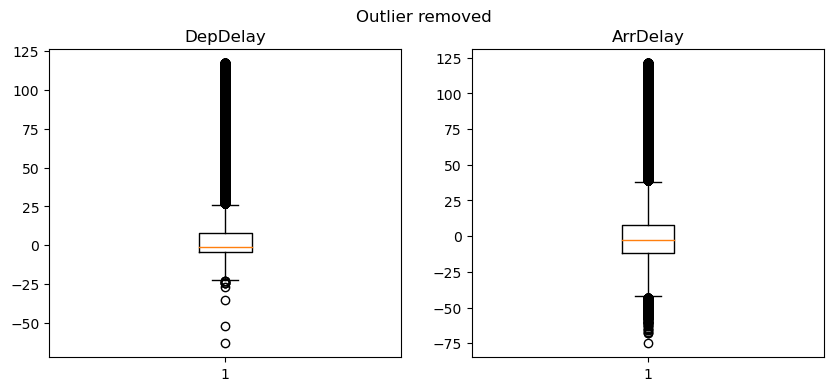

In [157]:
# Draw boxplots after remove outliers
create_boxplots(flights_outlier_rm_using_zscores,col1='DepDelay',col2='ArrDelay', title="Outlier removed")

In [ ]:
# Treating/ Cleaning outliers
# We could have aslo substituted outliers with the upper_limit like in the code below
#flights.loc[flights['DepDelay'] >= upper_limit,'DepDelay'] = upper_limit

In [151]:
#Option 3: Using quantiles to remove outlier between 0.01 and 90 percentile
def remove_outlier_using_quantile(df,col,upper_quant = 0.90, lower_quant = 0.01):
    uq = df[col].quantile(upper_quant)
    lq = df[col].quantile(lower_quant)
    return df[(df[col] > lq) & (df[col] < uq)]


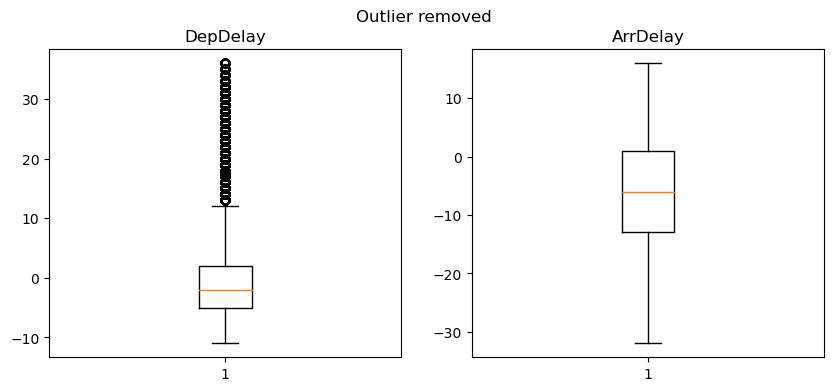

In [159]:
temp = remove_outlier_using_quantile(flights,'DepDelay')
flights_outlier_rm_using_quantiles = remove_outlier_using_quantile(temp,'ArrDelay')
create_boxplots(flights_outlier_rm_using_quantiles,col1='DepDelay',col2='ArrDelay', title="Outlier removed")

**View summary statistics for the numeric fields in the dataset.**

In [118]:
flights_outlier_rm.select_dtypes(include=['int64', 'float64']).describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,265373.0,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000,265373.000000
mean,2013.0,6.990003,15.804995,3.901117,12746.581864,12739.644858,1320.075686,6.238261,0.179366,1500.292513,2.208695,0.196527,0.010917
std,0.0,1.987058,8.809031,1.989264,1502.359475,1503.355507,470.763952,20.082005,0.383660,492.442900,23.360522,0.397372,0.103911
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,915.000000,-4.000000,0.000000,1115.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1315.000000,-1.000000,0.000000,1523.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1720.000000,8.000000,0.000000,1915.000000,8.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,117.000000,1.000000,2359.000000,121.000000,1.000000,1.000000


**Determine the distribution of the DepDelay and ArrDelay columns.**

In [136]:
def show_distribution(df, col,title = "Data distribution"):
    # Get stats
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    med_val = df[col].median()
    mode_val = df[col].mode()[0]
    print('Minimum:{:.2f}\nMaximum:{:.2f}\nAverage:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n'.format(min_val,
                                                                                           max_val,
                                                                                          mean_val,
                                                                                          med_val,
                                                                                         mode_val))
    # Create a figure for 2 subplots (2 rows, 1 col)
    fig,ax = plt.subplots(2,1,figsize = (10,4))
    
    # Plot the histogram
    ax[0].hist(df[col])
    ax[0].set_ylabel('Frequency')
    # Add the lines of mean median mode lines
    ax[0].axvline(x=min_val, color = 'gray',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=max_val, color = 'orange', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x= mean_val, color = 'blue',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mode_val, color = 'cyan', linestyle='dashed',linewidth=2)
    
    # Plot a boxplot
    ax[1].boxplot(df[col], vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle(title)
    

Minimum:-11.00
Maximum:36.00
Average:-0.13
Median:-2.00
Mode:-3.00



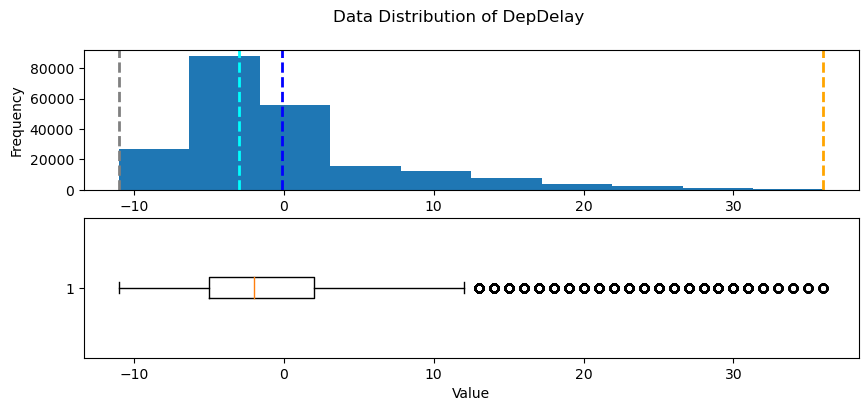

In [160]:
show_distribution(flights_outlier_rm_using_quantiles, 'DepDelay', title="Data Distribution of DepDelay")

Minimum:-32.00
Maximum:16.00
Average:-5.68
Median:-6.00
Mode:0.00



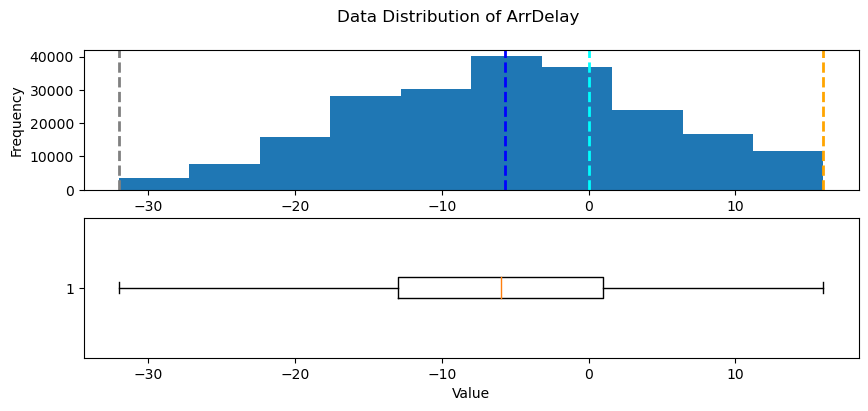

In [161]:
show_distribution(flights_outlier_rm_using_quantiles, col='ArrDelay', title="Data Distribution of ArrDelay")

**What are the average (mean) departure and arrival delays?**

In [165]:
mean_dep_delay = flights_outlier_rm_using_quantiles['DepDelay'].mean()
mean_arr_delay = flights_outlier_rm_using_quantiles['ArrDelay'].mean()
print("Mean departure dealy:{:.2f}\nMean arrival delay:{:.2f}".format(mean_dep_delay,mean_arr_delay))

Mean departure dealy:-0.13
Mean arrival delay:-5.68


**How do the carriers compare in terms of arrival delay performance?**

In [171]:
flights_outlier_rm_using_quantiles.groupby('Carrier')['ArrDelay'].median()

Carrier
9E   -9.0
AA   -7.0
AS   -4.0
B6   -7.0
DL   -8.0
EV   -8.0
F9   -2.0
FL   -5.0
HA   -3.0
MQ   -5.0
OO   -5.0
UA   -9.0
US   -6.0
VX   -6.0
WN   -3.0
YV   -5.0
Name: ArrDelay, dtype: float64

<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

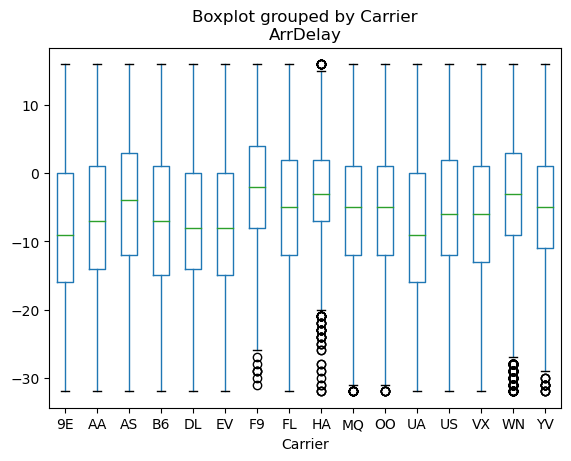

In [170]:
flights_outlier_rm_using_quantiles.boxplot(column='ArrDelay', by = 'Carrier', grid = False)

**Is there a noticable difference in arrival delays for different days of the week?**

In [174]:
flights_outlier_rm_using_quantiles.groupby('DayOfWeek')['ArrDelay'].median()

DayOfWeek
1   -6.0
2   -6.0
3   -6.0
4   -5.0
5   -5.0
6   -7.0
7   -6.0
Name: ArrDelay, dtype: float64

<Axes: title={'center': 'ArrDelay'}, xlabel='DayOfWeek'>

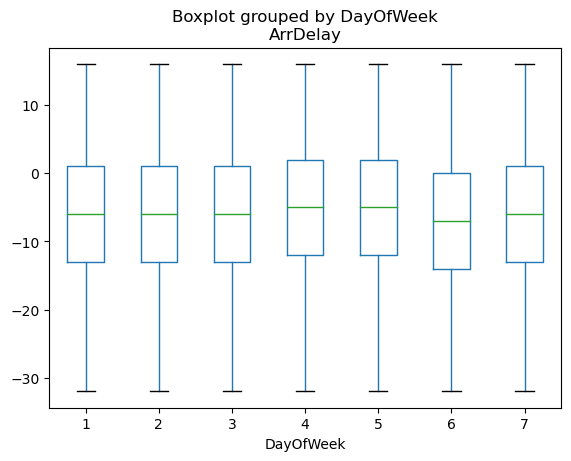

In [175]:
flights_outlier_rm_using_quantiles.boxplot(column='ArrDelay', by = 'DayOfWeek', grid=False)

Does not look like there is a noticable difference in ArrDelay on DayOfWeek

**Which departure airport has the highest average departure delay?**

In [176]:
flights_outlier_rm_using_quantiles.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [182]:
mean_dep_delay_airportwise = flights_outlier_rm_using_quantiles.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending = False).to_frame()

Chicago Midway International followed by Dallas Love Field Airports have highest DepDelay

<Axes: xlabel='OriginAirportName'>

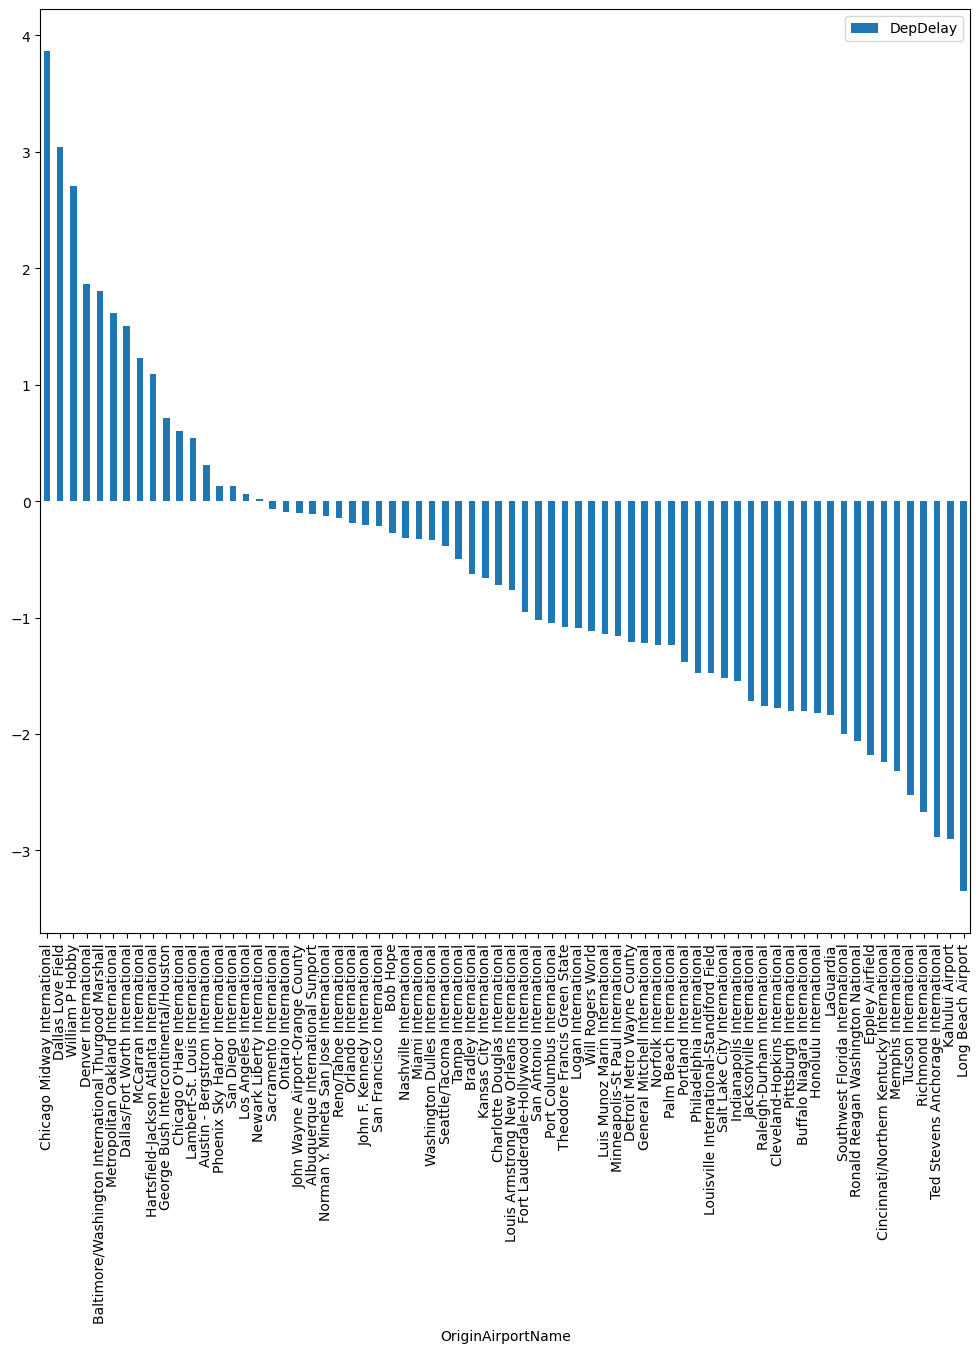

In [184]:
mean_dep_delay_airportwise.plot(kind = 'bar', figsize = (12,12))

**Do late departures tend to result in longer arrival delays than on-time departures?**

In [204]:
flights_outlier_rm_using_quantiles[flights_outlier_rm_using_quantiles['DepDelay']>1]['ArrDelay'].mean()

1.3546210687894906

In [215]:
def arr_delay_based_on_dep_delay(df,col = 'DepDelay',min = 1):
    return df[df[col] > min]['ArrDelay'].mean()

In [217]:
dep_delay_list = []
arr_delay_list = []
for min in range(0,10):
    mean_arr_delay = arr_delay_based_on_dep_delay(flights_outlier_rm_using_quantiles,min = min)
    dep_delay_list.append(min)
    arr_delay_list.append(mean_arr_delay)
    print("Departure delay:{:.2f}, Mean arrival delay:{:.2f}".format(min,mean_arr_delay))

Departure delay:0.00, Mean arrival delay:0.59
Departure delay:1.00, Mean arrival delay:1.35
Departure delay:2.00, Mean arrival delay:2.01
Departure delay:3.00, Mean arrival delay:2.61
Departure delay:4.00, Mean arrival delay:3.17
Departure delay:5.00, Mean arrival delay:3.73
Departure delay:6.00, Mean arrival delay:4.22
Departure delay:7.00, Mean arrival delay:4.72
Departure delay:8.00, Mean arrival delay:5.15
Departure delay:9.00, Mean arrival delay:5.59


There seems to be a relationship between DepDelay and ArrDelay which is sort of expected

In [219]:
#Lets draw some plotsde
delay_df = pd.DataFrame(list(zip(dep_delay_list,arr_delay_list)),columns=['DepDelay','MeanArrDelay'])

<Axes: xlabel='DepDelay', ylabel='MeanArrDelay'>

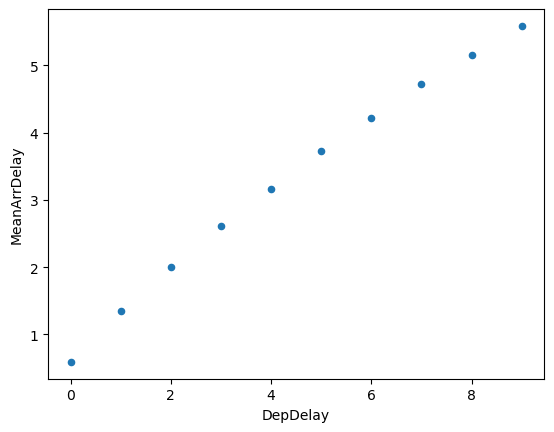

In [222]:
delay_df.plot.scatter(x = 'DepDelay',y='MeanArrDelay')

Seems like a near perfect relationship

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

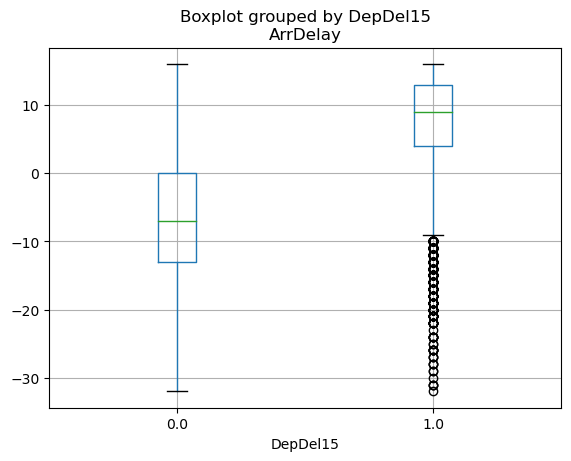

In [226]:
# Also let us use DepDelay15 column
flights_outlier_rm_using_quantiles.boxplot(column='ArrDelay',by = 'DepDel15')

This also shows that flights which get delayed more than 15 minutes have on average have arrival delay.

**Which route (from origin airport to destination airport) has the most late arrivals?**

In [227]:
flights_outlier_rm_using_quantiles.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [248]:
flights_outlier_rm_using_quantiles.groupby(['OriginAirportName','DestAirportName'])['ArrDel15'].sum().sort_values(ascending = False)


OriginAirportName                         DestAirportName                                     
San Francisco International               Los Angeles International                               67
Los Angeles International                 San Francisco International                             42
Detroit Metro Wayne County                Chicago O'Hare International                            29
LaGuardia                                 Logan International                                     29
                                          Chicago O'Hare International                            27
                                                                                                  ..
Norman Y. Mineta San Jose International   Honolulu International                                   0
                                          Hartsfield-Jackson Atlanta International                 0
                                          George Bush Intercontinental/Houston                   

San Francisco International -> Los Angeles International has the most number of delayed flights

**Which route has the highest average arrival delay?**

In [251]:
flights_outlier_rm_using_quantiles.groupby(['OriginAirportName','DestAirportName'])['ArrDelay'].mean().sort_values(ascending = False)


OriginAirportName                DestAirportName                
Theodore Francis Green State     Southwest Florida International    12.000000
Charlotte Douglas International  General Mitchell International     10.000000
Indianapolis International       Philadelphia International         10.000000
Port Columbus International      Logan International                 7.000000
Cleveland-Hopkins International  Philadelphia International          7.000000
                                                                      ...    
Lambert-St. Louis International  Cleveland-Hopkins International   -20.000000
Jacksonville International       Chicago Midway International      -20.000000
Eppley Airfield                  LaGuardia                         -20.750000
Denver International             Kahului Airport                   -22.666667
Indianapolis International       Logan International               -26.000000
Name: ArrDelay, Length: 2479, dtype: float64

Theodore Francis Green State -> Southwest Florida International has on avergae highest arrival delays